<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Code_challenge.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# K-means and hierarchical clustering MCQ
© ExploreAI Academy

In this MCQ, we will review and assess our understanding of the core concepts of k-means and hierarchical clustering.

## Learning objectives

By the end of this MCQ, you should be able to:
* Find the optimal number of clusters for a k-means clustering model.
* Apply the Kmeans clustering algorithm and evaluate its quality.
* Find the optimal number of clusters using hierachical clustering.
* Implement agglomerative hierarchical clustering.

## Introduction

The dataset contains information about mall customers, including their gender, age, annual income (in thousands of dollars), and spending score. Each row in the dataset represents a unique customer, identified by a CustomerID. The data was collected from a survey for marketing or customer segmentation purposes.

The primary objective of this analysis is to segment the customers based on their **annual income and spending scores** using K-means and hierarchical clustering. We aim to identify distinct groups of customers with similar spending behaviours and income levels. This segmentation can help in targeted marketing strategies, understanding customer preferences, and improving overall customer satisfaction and retention.

⚠️**Note**: This notebook is running Python version 3.11.14. To ensure that our results are consistent, please switch to this version. Please also note that the order of answers in the MCQ test itself might differ from what is presented here.

In [30]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/unsupervised_sprint/mall_customers.csv', index_col=0)
data

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


## Questions
### Question 1

Before we dive in, it’s crucial to acquaint ourselves with the dataset through exploration and preliminary analysis by understanding its characteristics.

Print the descriptive statistics of our dataset.
True or false. The `Spending_Score` is a number from 1 - 50.

#### Options:

* True
* False


In [31]:
# Compute descriptive statistics for the Spending_Score column
spending_stats = data['Spending_Score'].describe()

# Print the statistics
print(spending_stats)

# Answer the question
print("True" if 1 <= spending_stats['min'] <= 50 and 1 <= spending_stats['max'] <= 50 else "False")

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending_Score, dtype: float64
False


### Question 2
What is the total number of observations in this dataset?

#### Options:
* 100
* 150
* 200
* 250



### Question 3
Next, we need to check if the data contains any null values because missing values can disrupt the modelling process by causing errors or biases in our analysis.

Write code that will check if our dataset contains any null values. If so, fill them with zero's.
True or false. Our dataset contains no null values.

#### Options:

* True
* False


In [32]:
# Check if the dataset contains any null values
has_null_values = data.isnull().any().any()
print(f"True" if not has_null_values else "False")

# Fill null values with zeros
data_filled = data.fillna(0)

True


### Question 4
Since we are interested in segmenting our customers based on their **annual income and spending score**, let's visualise the relationship between this pair.

Generate a scatter plot showing the relationship between annual income and spending score for each customer in the dataset.

What insights can be inferred from the scatter plot?

#### Options:

* The data points exhibit a uniform distribution across the grid.
* There are visible clusters forming, particularly in the center of the plot.
* Points are evenly spread, indicating no discernible patterns or correlations.
* There is no relationship between annual income and spending score.



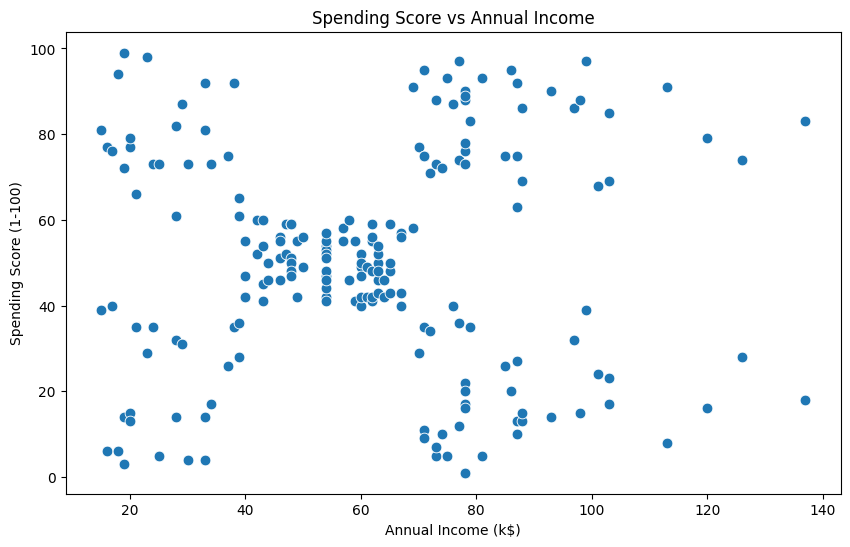

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatterplot of annual income vs spending score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual_Income_(k$)', y='Spending_Score', data=data, s=60)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score vs Annual Income')
plt.show()

- C. There are visible clusters forming, particularly in the center of the plot. The plot shows distinct groups of customers based on their annual income and spending score. These clusters suggest that customers with similar spending behaviors and income levels tend to group together. This information can be valuable for targeted marketing strategies and customer segmentation.

### Question 5
Before continuing our analysis, we need to scale our data to prevent attributes with larger magnitudes from dominating the distance calculations.

The code below attempts to scale the data but it returns an error.
Which of the following best explains why the provided code returns an error?

#### Options:


* The code fails because the MinMaxScaler requires the data to be in a specific range, and the provided data exceeds this range.

* The error occurs because the MinMaxScaler cannot handle missing values in the dataset.

* The code attempts to fit the MinMaxScaler on non-numeric data, resulting in a ValueError because the MinMaxScaler only works with numerical data.

* The code fails because the MinMaxScaler requires the input data to be a NumPy array, and the provided data is not in this format.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X_scaled = ms.fit_transform(data)

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Load your dataset (replace with your actual data)
data = data_filled

# Encode the 'Gender' column
le = LabelEncoder()
data['Gender_encoded'] = le.fit_transform(data['Genre'])

# Drop the original 'Gender' column if needed
data.drop(columns=['Genre'], inplace=True)

# Scale the remaining numeric features
ms = MinMaxScaler()
X_scaled = ms.fit_transform(data)

In [35]:
X_scaled

array([[0.01923077, 0.        , 0.3877551 , 1.        ],
       [0.05769231, 0.        , 0.81632653, 1.        ],
       [0.03846154, 0.00819672, 0.05102041, 0.        ],
       [0.09615385, 0.00819672, 0.7755102 , 0.        ],
       [0.25      , 0.01639344, 0.39795918, 0.        ],
       [0.07692308, 0.01639344, 0.76530612, 0.        ],
       [0.32692308, 0.02459016, 0.05102041, 0.        ],
       [0.09615385, 0.02459016, 0.94897959, 0.        ],
       [0.88461538, 0.03278689, 0.02040816, 1.        ],
       [0.23076923, 0.03278689, 0.7244898 , 0.        ],
       [0.94230769, 0.03278689, 0.13265306, 1.        ],
       [0.32692308, 0.03278689, 1.        , 0.        ],
       [0.76923077, 0.04098361, 0.14285714, 0.        ],
       [0.11538462, 0.04098361, 0.7755102 , 0.        ],
       [0.36538462, 0.04098361, 0.12244898, 1.        ],
       [0.07692308, 0.04098361, 0.79591837, 1.        ],
       [0.32692308, 0.04918033, 0.34693878, 0.        ],
       [0.03846154, 0.04918033,

### Question 6

Let's initiate our cluster analysis by selecting the features for segmentation. Given our focus on customer segmentation using their annual income and spending score, we'll designate the `Annual_Income_(k$)` and `Spending_Score` columns as the features for clustering, assigning them to the variable `X`.

Following feature selection, let's scale our data using the MinMaxScaler as attempted in the previous question and implement the K-Means clustering algorithm on the scaled dataset, opting for **5** clusters based on an initial analysis of our scatter plot.

Following the application of the K-Means model using 5 clusters, which of the following code snippets will display the coordinates of the centroids representing the clusters identified by the algorithm?

#### Options:
* `print(kmeans.centroids_)`
* **`print(kmeans.cluster_centers_)`**
* `print(kmeans.cluster_centers)`
* `print(kmeans.centroids)`

In [36]:
# Load the pre-processed and scaled dataset (df_scaled)

# Import KMeans from sklearn
from sklearn.cluster import KMeans

# Initialize the KMeans model with 6 clusters
kmeans_model = KMeans(n_clusters=6, random_state=42)

# Fit the model to the data
kmeans_model.fit(X_scaled)

# Get the coordinates of the centroids
centroids = kmeans_model.cluster_centers_

# Print the coordinates of the centroids
print("Coordinates of the centroids:")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i+1}: {centroid}")

Coordinates of the centroids:
Cluster 1: [0.19711538 0.3852459  0.72117347 1.        ]
Cluster 2: [ 5.90811966e-01  3.72950820e-01  3.54497354e-01 -2.77555756e-16]
Cluster 3: [1.52806653e-01 2.23083739e-01 5.76116933e-01 1.66533454e-16]
Cluster 4: [0.72850679 0.30568949 0.36734694 1.        ]
Cluster 5: [0.30357143 0.59016393 0.09475219 1.        ]
Cluster 6: [ 2.72893773e-01  5.82357533e-01  8.23129252e-01 -5.55111512e-17]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Question 7
To build an accurate model, there are methods we can use to determine the optimal number of clusters to employ in our analysis.

Which of the following measures are **NOT** typically used to help us determine the best K value for our data?

#### Options:
* Within-cluster variation
* Between-cluster variation
* Outer-cluster variation
* The CH index

### Question 8

Let's determine the optimal k value. Use the `Elbow method`, with `WCSS`, to find the best K value for our dataset.

Based on the elbow method plot, which is the best K value for our data?

#### Options:
* 3 clusters
* 5 clusters
* 7 clusters
* 10 clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

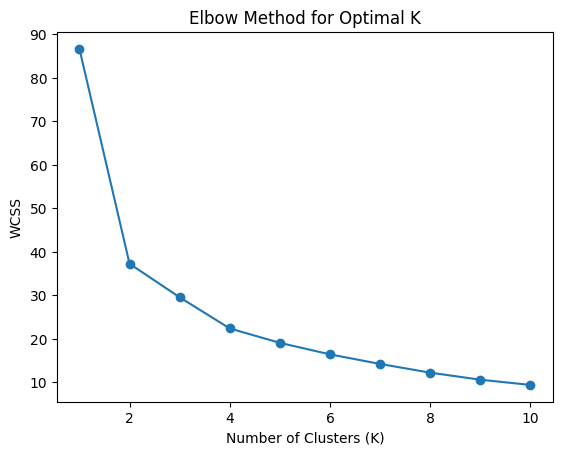

In [37]:
# Initialize a list to store WCSS values
wcss_values = []

# Iterate over K values
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    wcss_values.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.plot(range(1, 11), wcss_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

### Question 9
Let's evaluate the model's quality by computing its silhouette score.

Based on the results, what is the silhouette score for a k-means model with k=5 clusters?
#### Options:
* 0.625
* 0.559
* 0.715
* 0.890

In [38]:
# Import silhouette_score
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(X_scaled, kmeans_model.labels_)

# Print the silhouette score
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.3790


### Question 10
What does the resulting silhouette score indicate?

#### Options:

* It is quite bad because it is less than 10.
* It is good because it is greater than 0 and relatively close to 1.
* It is very bad because we want it to be closer to -1.
* The silhouette score does not really matter.

### Question 11

What is the next appropriate step after determining that the silhouette score for the optimal number of clusters, determined by the elbow method, is deemed unsatisfactory?

#### Options:
* Increase the number of clusters and recompute the silhouette score.
* Decrease the number of clusters and recompute the silhouette score.
* Ignore the silhouette score and proceed with the current clustering configuration.
* Use the silhouette score as input into decision-making when evaluating other clustering algorithms.

### Question 12
Hierarchical clustering could be a natural next step for further analysis, especially considering the presence of the outliers and the potentially uneven cluster shapes observed in the KMeans model results. Hierarchical clustering can offer insights into the hierarchical structure of the data, potentially capturing nuances that KMeans might overlook.

Which of the following is a key difference between KMeans and Hierarchical clustering algorithms?

#### Options:
* Hierarchical Clustering forms spherical clusters around centroids. Each data point belongs to the cluster with the nearest centroid. In contrast, KMeans builds a hierarchy of clusters, starting with individual data points and gradually merging them into larger clusters based on proximity.
* Hierarchical clustering assumes clusters to be spherical and of equal size, which may not always reflect the true underlying structure of the data, whereas KMeans can capture clusters of arbitrary shapes and sizes, offering more flexibility in cluster formation.
* Hierarchical clustering does not require the number of clusters to be predefined. It produces a hierarchical tree of clusters, and the number of clusters can be determined after the clustering process, whereas KMeans requires the number of clusters (K) to be specified in advance.
* Hierarchical Clustering requires the number of clusters (K) to be specified in advance. In contrast, KMeans does not require the number of clusters to be predefined. It produces a hierarchical tree of clusters, and the number of clusters can be determined after the clustering process.

### Question 13

What is the most appropriate number of clusters for the data points represented by the following dendrogram?

#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/mcq_dendrogram.jpeg"  style="width:400px";/>
</div>

#### Options:

* 2
* 4
* 6
* 8

### Question 14

The below code attempts to perform agglomerative clustering on the scaled data, **based on 5 clusters**, using the `AgglomerativeClustering` class from sklearn and print the resulting cluster labels. However, there is an error in the code. Which of the following options will fix the error and produce the desired results?

#### Options:
* Replace labels = fit_predict(X_scaled) with labels = cluster.fit_predict(X_scaled)

* Replace labels = fit_predict(X_scaled) with labels = cluster.predict(X_scaled)

* Replace labels = fit_predict(X_scaled) with labels = cluster.fit(X_scaled)

* Replace labels = fit_predict(X_scaled) with labels = cluster.fit_transform(X_scaled)


In [39]:
from sklearn.cluster import AgglomerativeClustering

# Initialize the AgglomerativeClustering model
cluster = AgglomerativeClustering(n_clusters=5, linkage='ward')

# Fit the model to the scaled data
labels = cluster.fit_predict(X_scaled)

print(labels)

[3 2 1 0 1 0 1 0 3 0 3 0 1 0 3 2 1 2 3 0 3 2 1 2 1 2 1 3 1 0 3 0 3 2 1 0 1
 0 1 0 1 2 3 0 1 0 1 0 0 0 1 3 0 3 1 3 1 3 0 3 3 2 1 1 3 2 1 1 2 0 3 1 1 1
 3 2 1 3 0 1 3 3 3 1 0 3 1 0 0 1 1 2 3 0 0 2 1 0 3 2 0 1 3 2 3 0 1 3 3 3 3
 0 0 2 0 0 1 1 1 1 2 0 0 2 0 0 3 2 4 2 4 2 0 0 4 0 1 2 4 0 1 2 0 0 4 2 3 0
 1 2 4 2 1 0 1 0 4 0 4 0 1 0 4 0 4 0 4 0 1 2 4 2 4 2 1 0 4 2 4 2 1 0 4 0 1
 2 1 2 1 0 1 0 4 0 1 0 1 2 4 2]


### Question 15

After creating a scatter plot visualising the clusters based on the cluster labels in question 14, we calculated and printed the mean values of each feature within each cluster, providing insights into the characteristics of each cluster. See image below.

#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/sklearn_MCQ_image.png"  style="width:1000px";/>
</div>

Which of the following best describes the characteristics of Cluster 3 based on the mean values of each feature?

#### Options:

* Cluster 3 consists of data points with below-average annual income and spending scores.

* Cluster 3 represents customers with average annual income and spending scores.

* Cluster 3 comprises data points with above-average annual income and spending scores.

* Cluster 3 includes customers with significantly low annual income and spending scores.

In [ ]:
#Your code here

### Question 16

Which of the following practical interpretations best describes Cluster 2 based on the mean values of each feature generated in question 15?

#### Options:

* Customers in Cluster 2, on average, earn more annually compared to the average earnings of all customers in the dataset.

* Customers in Cluster 2, on average, have lower annual income compared to the average earnings of all customers in the dataset.

* Customers in Cluster 2, on average, spend more compared to the average spending habits of all customers in the dataset.

* Customers in Cluster 2, on average, spend more compared to all the customers in the dataset because they earn more annually.

### Question 17

In order to understand the distribution of data points among different clusters we can visualise the number of data points per cluster using a bar chart.

Generate a bar chart that displays the number of data points in each cluster for both our features.

What inference can be drawn from the distribution of data points among clusters in our resulting clustering model?

#### Options:

* The clustering model has successfully separated the data into distinct and balanced clusters.

* The uneven distribution suggests potential issues with the clustering model's performance, such as overfitting.

* The clustering model demonstrates perfect separation of clusters, indicating robustness and accuracy.

* The imbalanced distribution suggests that the clustering algorithm requires more data to achieve better performance.

<ipython-input-41-e4fd5d671a75>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=kmeans_model.labels_, palette='viridis')


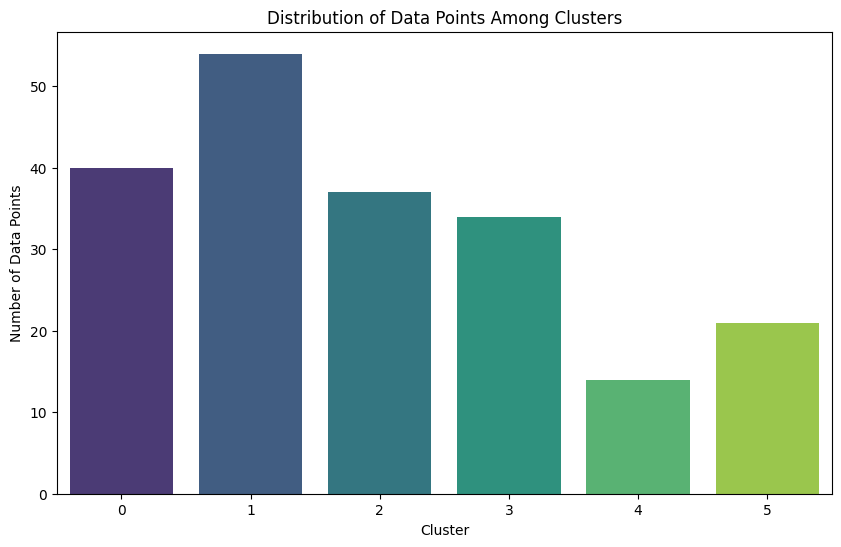

In [41]:
# Generate a bar chart showing the number of data points per cluster
plt.figure(figsize=(10, 6))
sns.countplot(x=kmeans_model.labels_, palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Distribution of Data Points Among Clusters')
plt.show()

### Question 18

When evaluating the quality of clustering using the `Davies-Bouldin Index (DBI)`, which of the following interpretations is correct?

#### Options:

* A lower DBI value indicates better clustering, where clusters are more compact and well-separated.
* A higher DBI value indicates better clustering, indicating more diverse and spread-out clusters.
* The DBI value does not provide any meaningful information about the clustering quality.
* The DBI value represents the average distance between all pairs of points in the dataset, with higher values indicating better clustering performance.

In [ ]:
#Your code here

### Question 19

Which linkage criterion measures the shortest distance between any two points in the two clusters being merged in hierarchical clustering?

#### Options
* Complete linkage
* Single linkage
* Average linkage
* Ward linkage

### Question 20

What is the best next step to take based on the silhouette scores for our KMeans clustering and Hierarchical clustering models, along with the distribution of data points in our clusters?

#### Options:

* Refit both clustering models with different hyperparameters.

* Perform further exploratory data analysis to understand the underlying patterns and potential reasons for the distribution of data points.

* Including additional relevant features to enrich the dataset and improve the clustering models' performance.

* All of the above

#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>